<a href="https://colab.research.google.com/github/IanPol0/DataScienceNetflix/blob/main/DataScienceNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LAS FUNCIONES EN CAMELCASE Y LAS VARIABLES EN SNAKECASE Y RESPETENLO
##Los subtitulos en '##', Los ejercicios en '###'

#Trabajo Práctico Netflix
Septiembre 2022

##Import

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/IanPol0/DataScienceNetflix/main/NetflixHistory.csv'
history = pd.read_csv(url)

##Delete devices not required

In [4]:
devices_remove = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 
'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 
'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']

#delete devices not required
for device in devices_remove:
  #print(len(history), device)
  history = history.drop(history.index[history['Device Type'] == device], inplace=False)
  history = history.reset_index(drop=True)

##Adapt time

In [5]:
#returns hours, minutes and seconds in seconds
def toSeconds(time_str):
  h, m, s = time_str.split(':')
  return int(h) * 3600 + int(m) * 60 + int(s)

##Divide series and movies

In [10]:
for i in range(len(history['Title'])):
  if history['Title'][i].__contains__('Temporada'):
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Capítulo'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Season'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Clip'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Resumen'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Tráiler'): 
    history['Type'][i] = 'serie'
  elif history['Title'][i].__contains__('Series'): 
    history['Type'][i] = 'serie'
  else:
    history['Type'][i] = 'movie'
#agregar Limited Series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib

In [12]:
series = history[history['Type'] == 'serie']
movies = history[history['Type'] == 'movie']
del history['Type'], series['Type'], movies['Type']

##Exercises

###a) Contabilizar el dispositivo con el que más títulos se reprodujeron.

In [13]:
devices_compare = {}

for dev in history['Device Type']:
  if dev not in devices_compare:
    devices_compare[dev] = 1
  else:
    devices_compare[dev] += 1

max(devices_compare, key=devices_compare.get)

'Apple Apple TV 4 Apple TV'

###b) Encontrar la película con más ocurrencias y la película con mayor duración total.

In [15]:
movies_compare = {}

for mov in movies.index:
  if movies["Title"][mov] not in movies_compare:
    movies_compare[movies["Title"][mov]] = 1
  else:
    movies_compare[movies["Title"][mov]] += 1

max(movies_compare, key=movies_compare.get)
#movies_compare

'Star Wars: El Imperio contraataca'

In [17]:
movies_duration = {}

for mov in movies.index:
  if movies["Title"][mov] not in movies_duration:
    movies_duration[movies["Title"][mov]] = toSeconds(movies["Duration"][mov])
  else:
    movies_duration[movies["Title"][mov]] += toSeconds(movies["Duration"][mov])

max(movies_duration, key=movies_duration.get)
#movies_duration

'Star Wars: El Imperio contraataca'

###c) Generar un TOP “N” de series vistas y graficar.

####i) Por tiempo visto.

In [49]:
series_duration = {}
nombre = ""
for ser in series.index:
  nombre = (series['Title'][ser].split(':'))[0]
  if nombre not in series_duration:
    series_duration[nombre] = toSeconds(series["Duration"][ser])
  else:
    series_duration[nombre] += toSeconds(series["Duration"][ser])

max(series_duration, key=series_duration.get)

'Cómo conocí a tu madre'

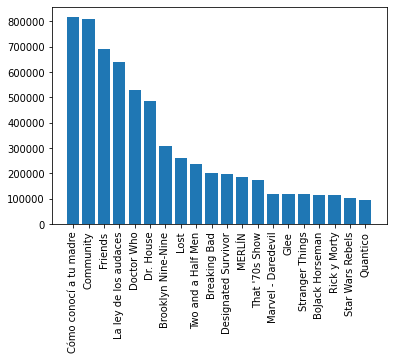

In [50]:
temp, final = {}, {}
temp = series_duration
for i in range(20):
  final[max(temp, key=temp.get)] = temp[max(temp, key=temp.get)]
  temp[max(temp, key=temp.get)] = 0
plt.bar(final.keys(), final.values())
plt.xticks(rotation = 90)
plt.show()

####ii) Por ocurrencias.

In [48]:
series_occurences = {}
nombre = ""
for ser in series.index:
  nombre = (series['Title'][ser].split(':'))[0]
  if nombre not in series_occurences:
    series_occurences[nombre] = 1
  else:
    series_occurences[nombre] += 1

max(series_occurences, key=series_occurences.get)

'Community'

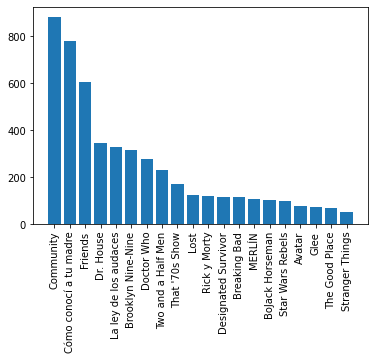

In [54]:
temp2, final2 = {}, {}
temp2 = series_occurences
for i in range(20):
  final2[max(temp2, key=temp2.get)] = temp2[max(temp2, key=temp2.get)]
  temp2[max(temp2, key=temp2.get)] = 0
plt.bar(final2.keys(), final2.values())
plt.xticks(rotation = 90)
plt.show()

###d) Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.

###e) Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

In [76]:
titulos_x_anio = {}
anio = ""
for ser in series.index:
  anio = (series['Start Time'][ser].split('-'))[0]
  if anio not in titulos_x_anio:
    titulos_x_anio[anio] = 1
  else:
    titulos_x_anio[anio] += 1
 